Reference [labml.ai](https://github.com/labmlai/annotated_deep_learning_paper_implementations/blob/940b3c01fc87c9487ad9478eec09f0167e177e2a/labml_nn/transformers/positional_encoding.py#L1)

In [ ]:
import math

import numpy as np
import torch
import torch.nn as nn

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, dropout_prob: float, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(dropout_prob)
        self.register_buffer('positinonal_encodings', get_positional_encoding(d_model, max_len), False) # state_dict()에 포함시키지 않음.

    def forward(self, x: torch.Tensor):
        pe = self.positional_encodings[:x.shape[0]].detach().requires_grad_(False)
        x = x + pe
        x = self.dropout(x)
        return x

$PE_{p,2i} = sin({p\over {10000^{2i\over d_{model}}}})$

$PE_{p,2i + 1} = cos({p\over {10000^{2i\over d_{model}}}})$

In [ ]:
def get_positional_encoding(d_model: int, max_len: int = 5000):
    
    encodings = torch.zeros(max_len, d_model) # 빈 인코딩 벡터
    position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1) # positional index (max_len, 1)

    two_i = torch.arange(0, d_model, 2, dtype=torch.float32) # (d_model)
    div_term = torch.exp(two_i * -(math.log(10000.0) / d_model))
    encodings[:, 0::2] = torch.sin(position * div_term) # (max_len, d_model)
    encodings[:, 1::2] = torch.cos(position * div_term)

    # batch 차원 추가: (S, E) -> (S, B, E)
    encodings = encodings.unsqueeze(1).requires_grad_(False)
    
    return encodings

In [ ]:
pe = get_positional_encoding(20, 100)
pe.shape

torch.Size([100, 1, 20])

In [ ]:
def _test_positional_encoding():
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 5))
    pe = get_positional_encoding(20, 100)
    plt.plot(np.arange(100), pe[:, 0, 4:8].numpy())
    plt.legend(["dim %d" % p for p in [4, 5, 6, 7]])
    plt.title("Positional encoding")
    plt.show()

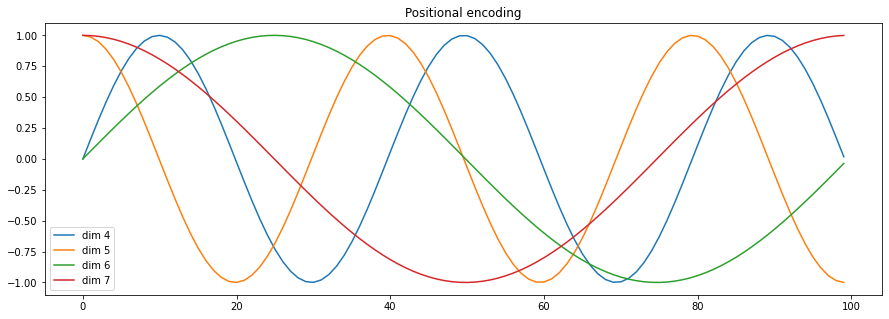

In [ ]:
_test_positional_encoding()

# Import test

In [ ]:
%cd /content/drive/MyDrive/data_science_project/papers/transformer

/content/drive/MyDrive/data_science_project/papers/transformer


In [ ]:
!python ./utils/positional_encoding.py

<Figure size 1500x500 with 1 Axes>


# Scratch Note

In [ ]:
torch.arange(0, 512, 2, dtype=torch.float32)

tensor([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
         24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
         48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
         72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
         96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
        120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
        144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
        168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
        192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
        216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
        240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
        264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
        288., 290., 292., 294., 296., 29

In [ ]:
max_len = 20
d_model = 100

encodings = torch.zeros(max_len, d_model) # 빈 인코딩 벡터
position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1) # positional index

In [ ]:
print(encodings.shape)
print(position.shape)

torch.Size([20, 100])
torch.Size([20, 1])


In [ ]:
two_i = torch.arange(0, d_model, 2, dtype=torch.float32)
div_term = torch.exp(two_i * -(math.log(10000.0) / d_model))

In [ ]:
two_i.shape

torch.Size([50])

In [ ]:
div_term.shape

torch.Size([50])

In [ ]:
encodings[:, 0::2] = torch.sin(position * div_term)
encodings.shape

torch.Size([20, 100])

In [ ]:
torch.sin(position * div_term).shape

torch.Size([20, 50])